In [1]:
# Import External Packages
import scipy.stats as scs
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle

# Importing Custom Functions
import plotFns as psyplt
import helperFns as mf

# Setting Seed for Reproducibility
np.random.seed(2021)

curPath = os.path.abspath(os.getcwd())

C:\Users\Jared\AppData\Local\Temp\ipykernel_13552\4102054588.py:34: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  toSave = pd.concat([toSave, temp], axis = 0)


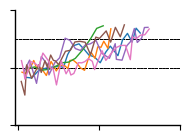

In [3]:
#Figure 1D (Upper panel)

IDs = ('GS027', 'GS037','JC028', 'JC039', 'JC044', 'JC052', 'JC061')

fig, ax = plt.subplots(1,1, figsize = (2,1.5))

ni = 0
for ID in IDs:

    keyword = "training"
    cutoff = 60
    numSessions = None
    trainingD = mf.getD(ID, keyword = keyword, cutoff = cutoff, sessionCutoff = numSessions, txt = None, untilTesting = True)
    mat = {
        'sess': trainingD['session'],
        'acc': trainingD['correct'],
    }
    mat= pd.DataFrame(mat)

    accs = mat.groupby(['sess'])['acc'].mean()
    trials = np.cumsum(trainingD['dayLength'])

    temp = {
        'Trials': trials,
        'Accuracy': accs,    
    }
    temp = pd.DataFrame(temp)
    temp['ID'] = ID

    if ni == 0:
        toSave = temp
        ni = 1
    else:
        toSave = pd.concat([toSave, temp], axis = 0)

    
    plt.axhline(0.5,color = 'k', linestyle = '--', linewidth = 0.5, zorder = 0)
    plt.axhline(0.75,color = 'k', linestyle = '--', linewidth = 0.5, zorder = 0)
    plt.plot(trials, accs, linewidth = 1, zorder = 1)

ax.set(xlabel = None)
ax.set(ylabel = None)

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

plt.yticks([0,0.5, 1])
plt.xticks([0,5000,10000])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

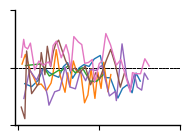

In [4]:
#Figure 1D (Bottom panel)

IDs = ('GS027', 'GS037','JC028', 'JC039', 'JC044', 'JC052', 'JC061')

fig, ax = plt.subplots(1,1, figsize = (2,1.5))

ni = 0
for ID in IDs:

    keyword = "training"
    cutoff = 60
    numSessions = None
    trainingD = mf.getD(ID, keyword = keyword, cutoff = cutoff, sessionCutoff = numSessions, txt = None, untilTesting = True)
    mat = {
        'sess': trainingD['session'],
        'acc': trainingD['correct'],
        'cat': trainingD['answer'],
    }
    mat= pd.DataFrame(mat)

    accs = mat.groupby(['sess'])['acc'].mean()
    trials = np.cumsum(trainingD['dayLength'])

    accs2 = mat.groupby(['sess','cat'])['acc'].mean()
    bias = np.array(accs2.iloc[1::2]) - np.array(accs2.iloc[0::2])

    temp = {
        'Trials': trials,
        'Bias': bias,    
    }
    temp = pd.DataFrame(temp)
    temp['ID'] = ID

    if ni == 0:
        toSave = temp
        ni = 1
    else:
        toSave = pd.concat([toSave, temp], axis = 0)

    plt.axhline(0,color = 'k', linestyle = '--', linewidth = 0.5, zorder=0)
    plt.plot(trials, bias, linewidth = 1, zorder = 1)

ax.set(xlabel = None)
ax.set(ylabel = None)

plt.yticks([-1,0,1])
plt.xticks([0,5000,10000])

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(1)

plt.tight_layout()
plt.show()


In [5]:
# Structuring muscimol data

db = os.path.abspath(os.path.join(curPath,"data/MuscData"))

file = mf.find_files('.pkl', 'musc_data', db)[0]
with open(file, 'rb') as f:
    inactivation_struct = pickle.load(f)

# We need to go through and collect *pairs of values*. Specifically, we need to pull out values for accuracy and for the best-fitting slope.

pbs_accuracy = []
mus_accuracy = []

pbs_lapse = []
mus_lapse = []

pbs_slope = []
mus_slope = []

pbs_guess = []
mus_guess = []

pbs_bound = []
mus_bound = []

ids = ['JC047','JC052','JC057','JC059','JC061','JC062']
mice = ['JC047','JC047','JC047','JC052','JC052','JC052','JC052', 'JC057','JC057','JC057','JC057',
        'JC059','JC059','JC059','JC061','JC061','JC061','JC062','JC062','JC062']

tm = 0
tp = 0

for id in ids:
    temp = inactivation_struct[id]
    mus = temp['mus']
    pbs = temp['pbs']
    keys = list(mus.keys())

    for k in keys:
        acc = mus[k]['behavior']['acc']
        acc = np.mean(acc[acc < 99]) # Accuracy
        lr = mus[k]['fit_params']['mean'].iloc[0,3] # Lapse Rate
        sl = mus[k]['fit_params']['mean'].iloc[0,2] # Slope
        gr = mus[k]['fit_params']['mean'].iloc[0,0] # Guess
        bn = mus[k]['fit_params']['mean'].iloc[0,1] # Bound

        if tm == 0:
            mus_acc = np.array(acc)
            mus_lapse = np.array(lr)
            mus_slope = np.array(sl)
            mus_guess = np.array(gr)
            mus_bound = np.array(bn)
            tm = 1
        else:
            mus_acc = np.append(mus_acc, np.array(acc))
            mus_lapse = np.append(mus_lapse, np.array(lr))
            mus_slope = np.append(mus_slope, np.array(sl))
            mus_guess = np.append(mus_guess, np.array(gr))
            mus_bound = np.append(mus_bound, np.array(bn))

        acc = pbs[k]['behavior']['acc']
        acc = np.mean(acc[acc < 99]) # Accuracy
        lr = pbs[k]['fit_params']['mean'].iloc[0,3] # Lapse Rate
        sl = pbs[k]['fit_params']['mean'].iloc[0,2] # Slope
        gr = pbs[k]['fit_params']['mean'].iloc[0,0] # Guess
        bn = pbs[k]['fit_params']['mean'].iloc[0,1] # Bound

        if tp == 0:
            pbs_acc = np.array(acc)
            pbs_lapse = np.array(lr)
            pbs_slope = np.array(sl)
            pbs_guess = np.array(gr)
            pbs_bound = np.array(bn)
            tp = 1
        else:
            pbs_acc = np.append(pbs_acc, np.array(acc))
            pbs_lapse = np.append(pbs_lapse, np.array(lr))
            pbs_slope = np.append(pbs_slope, np.array(sl))
            pbs_guess = np.append(pbs_guess, np.array(gr))
            pbs_bound = np.append(pbs_bound, np.array(bn)) 

mat = {
    'id': mice,
    'p_acc': pbs_acc,
    'p_slope': pbs_slope,
    'p_bound': pbs_bound,
    'm_acc': mus_acc,
    'm_slope': mus_slope,
    'm_bound': mus_bound,
}
df = pd.DataFrame(mat) 

tm = 0
tp = 0

for id in ids:
    temp = inactivation_struct[id]
    mus = temp['mus']
    pbs = temp['pbs']
    keys = list(mus.keys())

    for k in keys:

        hd = mus[k]['fit_params']['mean'].head(1)
        
        if tm == 0:
            mp = hd
            tm = 1
        else:
            mp = pd.concat([mp, hd], axis = 0)
        
        hd = pbs[k]['fit_params']['mean'].head(1)
        
        if tp == 0:
            pp = hd
            tp = 1
        else:
            pp = pd.concat([pp, hd], axis = 0)

fn = mus[k]['function']


Wilcoxon signed-rank test:
Statistic: 11.0
p-value: 0.0001049041748046875


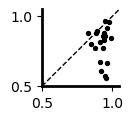

In [7]:
# Figure 1E

fig, ax = psyplt.plot_and_wilcoxon(pbs_acc, mus_acc, 'PBS Accuracy', 'Muscimol Accuracy', [0.5,1.05],[0.5,1.05])

ax.set(xlabel = None)
ax.set(ylabel = None)
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True
    ) # labels along the bottom edge are off

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)


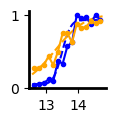

In [8]:
# Figure 1F

# Replace "comp" with '1'/'2'/'3' for different session pair comparisons

comp = '2'

fig, ax = plt.subplots(1,1, figsize = (1, 1))

temp = inactivation_struct['JC047']
mus = temp['mus']
pbs = temp['pbs']

ppt = pp.apply(fn, axis = 1)
mpt = mp.apply(fn, axis = 1)
x = np.linspace(np.log2(6000), np.log2(28000), 50)

plt.plot(x,ppt.iloc[int(comp)],'b--')
plt.plot(x,mpt.iloc[int(comp)],'--', color = 'orange')

f = pbs[comp]['behavior']['stimulus_frequency']
r = pbs[comp]['behavior']['choice']

nBins = 15

binnedMean,binnedFreq, *_ = scs.binned_statistic(f, r, statistic = np.nanmean, bins = nBins, range=(f.min(),f.max()))
binnedFreq = binnedFreq[:len(binnedFreq)-1] + (binnedFreq[1] - binnedFreq[0])/2

plt.plot(binnedFreq, binnedMean, 'b.-', label = 'data')

pdat = binnedMean

###

f = mus[comp]['behavior']['stimulus_frequency']
r = mus[comp]['behavior']['choice']

binnedMean,binnedFreq, *_ = scs.binned_statistic(f, r, statistic = np.nanmean, bins = nBins, range=(f.min(),f.max()))
binnedFreq = binnedFreq[:len(binnedFreq)-1] + (binnedFreq[1] - binnedFreq[0])/2

plt.plot(binnedFreq, binnedMean, '.-', color = 'orange', label = 'data')

mdat = binnedMean

ax.set(xlabel = None)
ax.set(ylabel = None)

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True
    ) # labels along the bottom edge are off

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_linewidth(2)
